<img src="./images/banner.png" width="800">

# Building Structured Multi-plot Grids

Data visualization is a powerful tool for exploring and communicating insights from complex datasets. When dealing with multi-dimensional data, it's often beneficial to create multiple plots that show different aspects or subsets of the data. Seaborn, a statistical data visualization library built on top of Matplotlib, provides powerful tools for creating structured multi-plot grids that can help uncover patterns and relationships in your data.


Multi-plot grids are arrangements of multiple plots in a single figure, allowing for the simultaneous visualization of different aspects of a dataset. These grids are particularly useful for:

1. Comparing distributions across different subgroups
2. Visualizing relationships between multiple variables
3. Exploring how patterns change across different conditions


🔑 **Key Concept:** Multi-plot grids in Seaborn are often referred to as "lattice" or "trellis" plots, and they're related to the concept of "small multiples" in data visualization.


Seaborn offers two main classes for creating multi-plot grids:

1. **FacetGrid**: Used for creating conditional small multiples. It allows you to create a grid of plots where each plot shows the same type of visualization for a different subset of your data.

2. **PairGrid**: Used for visualizing pairwise relationships between variables in your dataset. It creates a matrix of plots showing how each variable relates to every other variable.


Multi-plot grids offer several advantages in data analysis and visualization:

1. **Efficient comparison**: They allow for quick and easy comparison of patterns across different subgroups or conditions.

2. **Dimensionality reduction**: They help in visualizing high-dimensional data by breaking it down into multiple lower-dimensional plots.

3. **Context preservation**: By showing multiple related plots together, they preserve the context that might be lost when looking at individual plots separately.

4. **Scalability**: They can accommodate large datasets by distributing the information across multiple subplots.


Multi-plot grids enable you to extract a large amount of information from complex datasets quickly and intuitively, making them invaluable tools for exploratory data analysis and communication of results.


In Seaborn, multi-plot grids are typically created in two steps:

1. Initialize the grid object (`FacetGrid` or `PairGrid`)
2. Map plotting functions onto the grid


Here's a basic example using `FacetGrid`:


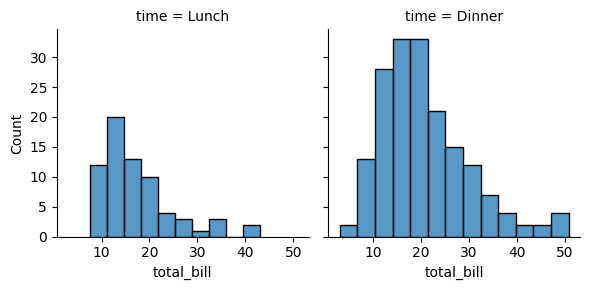

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset("tips")

# Initialize the FacetGrid
g = sns.FacetGrid(tips, col="time")

# Map a plotting function (histogram in this case)
g.map(sns.histplot, "total_bill")

This code creates a grid with two columns, one for each unique value in the "time" column of the dataset, and plots a histogram of the "total_bill" variable in each column.


Seaborn's multi-plot grids are highly customizable. You can control various aspects such as:

- The number and arrangement of subplots
- The variables used for faceting
- The type of plot in each subplot
- Color schemes and other aesthetic elements


💡 **Pro Tip:** While Seaborn provides high-level functions like `relplot()`, `displot()`, and `catplot()` that use `FacetGrid` internally, understanding the underlying grid objects gives you more control and flexibility in your visualizations.


In the following sections, we'll dive deeper into `FacetGrid` and `PairGrid`, exploring their capabilities and how to customize them for your specific visualization needs.

**Table of contents**<a id='toc0_'></a>    
- [FacetGrid: Creating Conditional Small Multiples](#toc1_)    
  - [Enhancing Visualizations with Hue](#toc1_1_)    
  - [Customizing FacetGrid](#toc1_2_)    
  - [Advanced Techniques: Custom Functions](#toc1_3_)    
- [PairGrid and Pairplot: Visualizing Pairwise Data Relationships](#toc2_)    
  - [Customizing Pairplot](#toc2_1_)    
  - [When to Choose PairGrid over Pairplot](#toc2_2_)    
  - [Advanced Example: Combining PairGrid and Pairplot Concepts](#toc2_3_)    
- [JointGrid and Jointplot: Visualizing Bivariate Relationships with Marginal Distributions](#toc3_)    
  - [Customizing Jointplot](#toc3_1_)    
  - [Using JointGrid for More Flexibility](#toc3_2_)    
  - [Advanced Example: Combining JointGrid and Regression](#toc3_3_)    
- [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[FacetGrid: Creating Conditional Small Multiples](#toc0_)

FacetGrid is a powerful tool in Seaborn for creating conditional small multiples, also known as "lattice" or "trellis" plots. These visualizations allow you to explore how relationships between variables change across different subsets of your data, providing a comprehensive view of complex datasets.


FacetGrid works by mapping a dataset onto multiple axes arranged in a grid. The rows and columns of this grid correspond to levels of variables in the dataset. Here's a basic example:


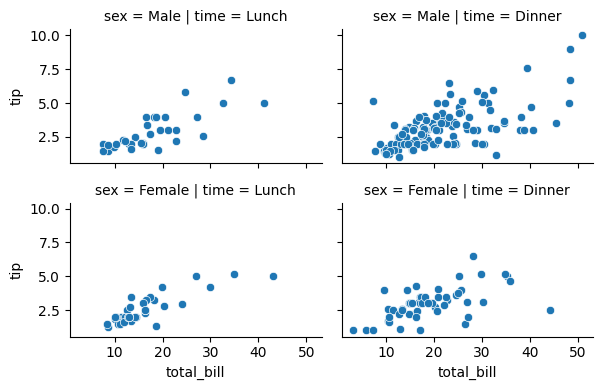

In [9]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create a FacetGrid
g = sns.FacetGrid(tips, col="time", row="sex", height=2, aspect=1.5)

# Map a scatterplot onto the grid
g.map(sns.scatterplot, "total_bill", "tip")

This code creates a grid with two columns (for "Lunch" and "Dinner") and two rows (for "Male" and "Female"), showing the relationship between total bill and tip amount for each combination.


FacetGrid is particularly useful when you want to:

1. Compare distributions or relationships across different categories
2. Visualize how patterns change across multiple conditions
3. Explore interactions between three or more variables

However, FacetGrid might not be the best choice when:

- You have too many categories, leading to overcrowded or tiny subplots
- The relationships you're exploring are simple and don't require multiple plots
- You're dealing with time series data that would be better represented in a single plot


### <a id='toc1_1_'></a>[Enhancing Visualizations with Hue](#toc0_)


FacetGrid allows for an additional dimension of comparison using the `hue` parameter. This adds color differentiation within each subplot:


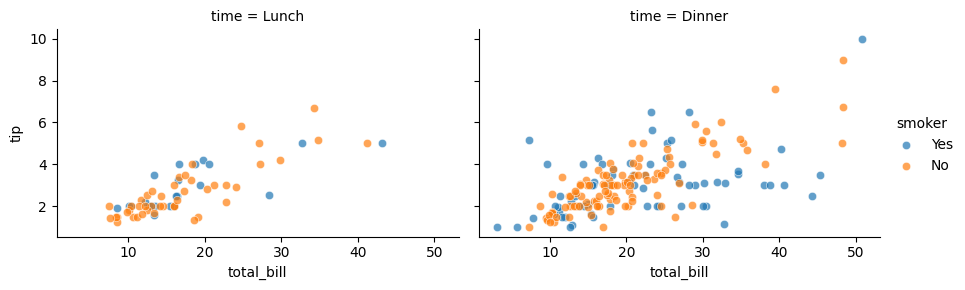

In [7]:
g = sns.FacetGrid(tips, col="time", hue="smoker", height=3, aspect=1.5)
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)
g.add_legend()

💡 **Pro Tip:** Use `hue` sparingly to avoid overwhelming the viewer with too much information. It's most effective when you have a clear, categorical variable that adds meaningful contrast to your data.


### <a id='toc1_2_'></a>[Customizing FacetGrid](#toc0_)


FacetGrid offers extensive customization options. Here's an example that showcases several of these:


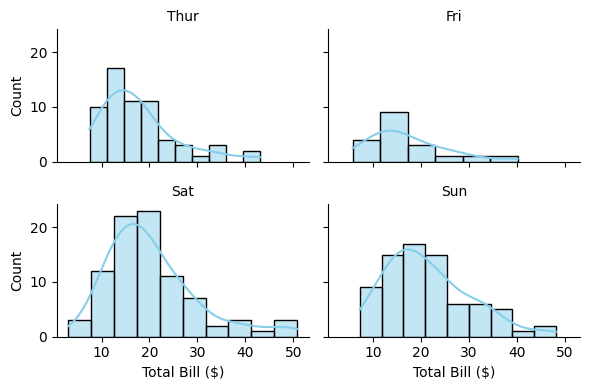

In [26]:
g = sns.FacetGrid(tips, col="day", height=2, aspect=1.5, col_wrap=2)
g.map(sns.histplot, "total_bill", kde=True, color="skyblue", line_kws=dict(color="navy"))
g.set_axis_labels("Total Bill ($)", "Count")
g.set_titles("{col_name}")
g.tight_layout()

This creates a grid of histograms showing the distribution of total bills for each day of the week, with a kernel density estimate overlay.


### <a id='toc1_3_'></a>[Advanced Techniques: Custom Functions](#toc0_)


FacetGrid allows you to map custom functions onto the grid, enabling complex visualizations:


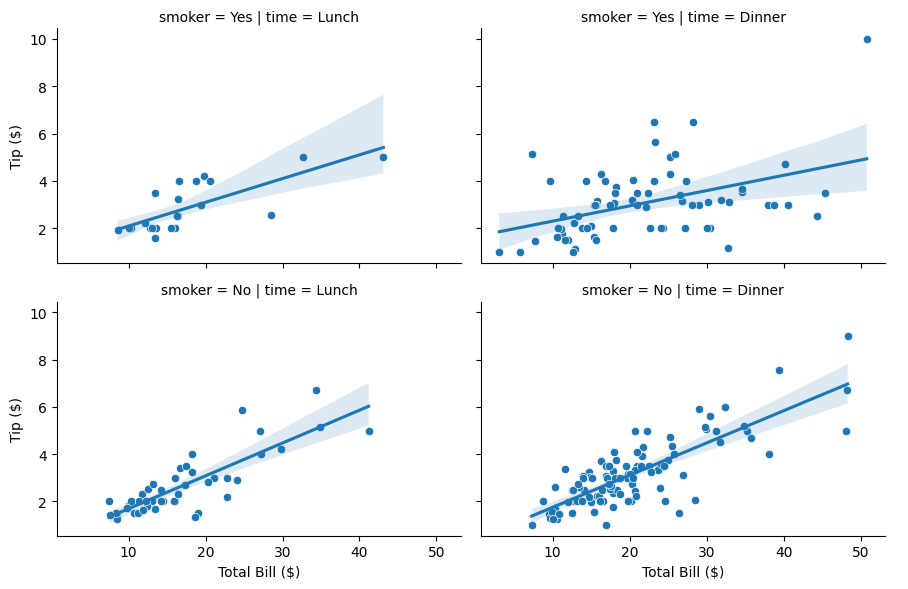

In [15]:
def plot_mean_and_ci(x, y, **kwargs):
    ax = plt.gca()
    sns.scatterplot(x=x, y=y, **kwargs)
    sns.regplot(x=x, y=y, scatter=False, ax=ax)

g = sns.FacetGrid(tips, col="time", row="smoker", height=3, aspect=1.5)
g.map(plot_mean_and_ci, "total_bill", "tip")
g.set_axis_labels("Total Bill ($)", "Tip ($)")
g.add_legend()

This example creates a custom function that plots both a scatter plot and a regression line, then maps it onto our FacetGrid.


When using FacetGrid, consider the following best practices:
1. **Keep it simple:** While FacetGrid is powerful, too many facets can be overwhelming. Aim for a balance between detail and clarity.

2. **Mind the scales:** By default, each facet might have different scales. Use `g.set(xlim=..., ylim=...)` to ensure consistent scales across facets when appropriate.

3. **Use color wisely:** When using `hue`, choose color palettes that are colorblind-friendly and distinct.

4. **Add context:** Use `g.set_axis_labels()` and `g.set_titles()` to provide clear labels for your facets.

5. **Consider alternatives:** For pairwise relationships between many variables, PairGrid or pairplot might be more suitable.

🤔 **Why This Matters:** Mastering FacetGrid allows you to create rich, multidimensional visualizations that can reveal complex patterns in your data. It's a powerful tool for both exploratory data analysis and communicating results.


By leveraging FacetGrid effectively, you can create insightful, publication-quality visualizations that tell a comprehensive story about your data across multiple dimensions.

## <a id='toc2_'></a>[PairGrid and Pairplot: Visualizing Pairwise Data Relationships](#toc0_)

PairGrid and pairplot are both powerful tools in Seaborn for visualizing pairwise relationships between multiple variables in a dataset. While PairGrid offers more flexibility, pairplot provides a convenient wrapper for common use cases:

- PairGrid is a more flexible, lower-level interface that allows for fine-grained control over the plot.
- Pairplot is a higher-level function that creates a PairGrid and populates it with plots in a single function call.


Let's look at a basic example of pairplot:


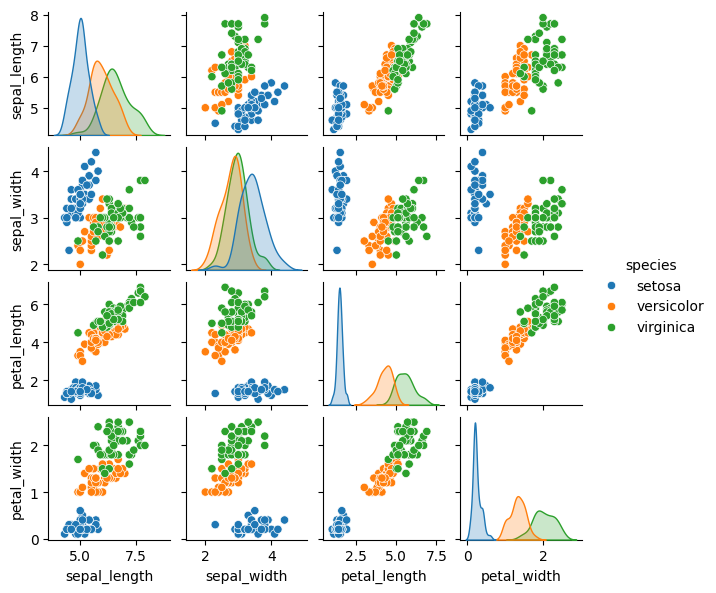

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a pairplot
sns.pairplot(iris, hue="species", height=1.5)

This single line of code creates a grid of scatter plots for all pairwise combinations of numeric variables, with histograms on the diagonal, and colors points by species.


When to use PairGrid:
- You need precise control over each subplot
- You want to use different plot types for different variable combinations
- You're creating a custom visualization that pairplot doesn't support out of the box

When to use pairplot:
- You want a quick overview of pairwise relationships
- The default plot types (scatter plots and histograms) suit your needs
- You're in the early stages of exploratory data analysis


### <a id='toc2_1_'></a>[Customizing Pairplot](#toc0_)


While pairplot is simpler, it still offers various customization options:


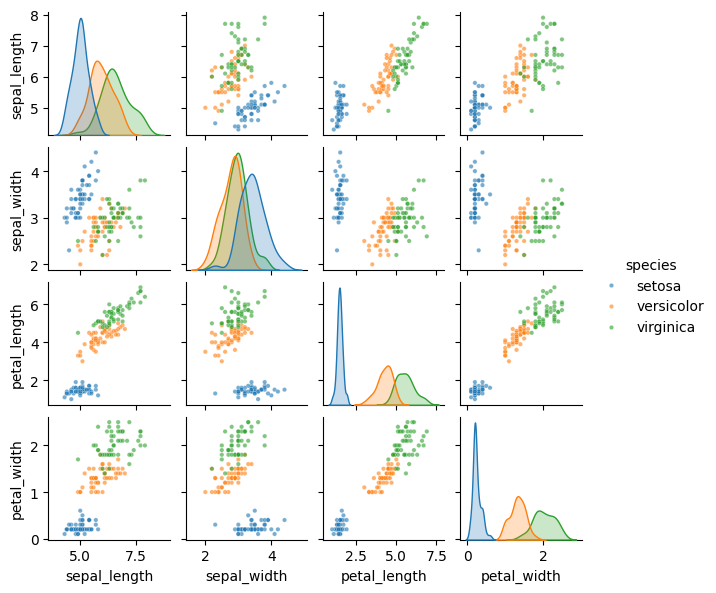

In [34]:
sns.pairplot(
    iris, hue="species", diag_kind="kde", plot_kws={"alpha": 0.6, "s": 10}, height=1.5
)

This example uses kernel density estimates on the diagonal and customizes the appearance of the scatter plots.


### <a id='toc2_2_'></a>[When to Choose PairGrid over Pairplot](#toc0_)


Let's look at a scenario where PairGrid's flexibility is beneficial:


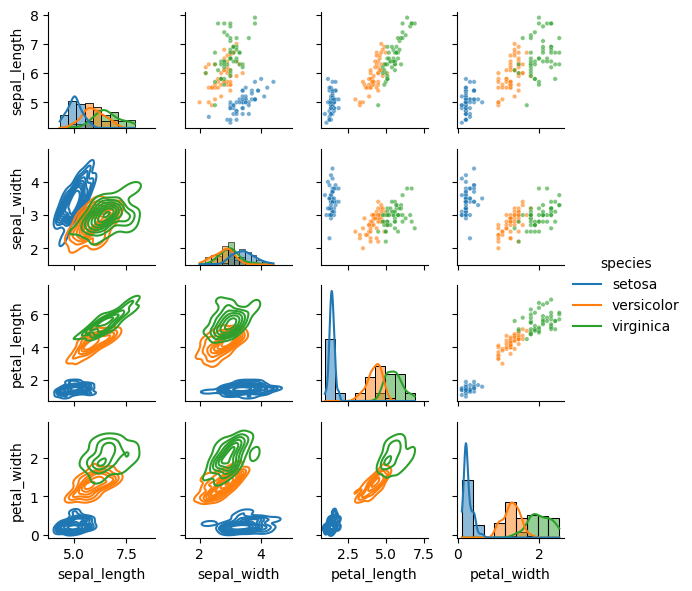

In [38]:
g = sns.PairGrid(iris, hue="species", height=1.5)
g.map_upper(sns.scatterplot, s=10, alpha=0.6)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()

This PairGrid uses different plot types for the upper and lower triangles, which isn't directly possible with pairplot.


### <a id='toc2_3_'></a>[Advanced Example: Combining PairGrid and Pairplot Concepts](#toc0_)


Let's create a visualization that combines the ease of pairplot with the flexibility of PairGrid:


Text(0.5, 1.02, 'Iris Dataset: Pairwise Relationships and Correlations')

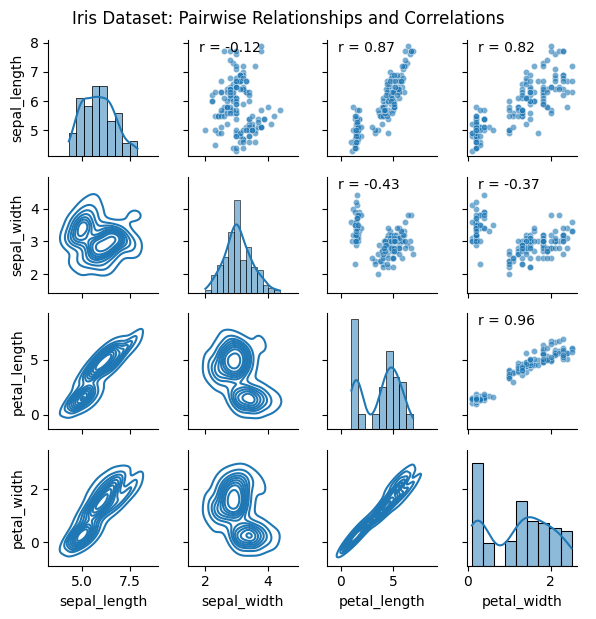

In [46]:
import numpy as np

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

# Create a custom pairplot-like visualization
g = sns.PairGrid(iris, height=1.5)
g.map_upper(sns.scatterplot, s=20, alpha=0.6)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.map_upper(corr_func)
g.add_legend()

plt.suptitle("Iris Dataset: Pairwise Relationships and Correlations", y=1.02)

This example creates a pairplot-like visualization but adds correlation coefficients to the upper triangle, demonstrating how PairGrid allows for more complex, customized visualizations.


💡 **Pro Tip:** Start with pairplot for quick exploratory analysis. If you need more control or custom elements, switch to PairGrid.



When using PairGrid and pairplot, consider the following best practices:
1. **Data preparation:** Both PairGrid and pairplot work best with tidy data. Ensure your dataset is properly formatted before visualization.

2. **Variable selection:** While it's tempting to include all variables, too many can make the plot cluttered. Focus on the most relevant variables.

3. **Handling categorical variables:** Pairplot and PairGrid are primarily designed for numeric variables. For categorical data, consider using catplot or custom PairGrid configurations.

4. **Performance:** For large datasets, pairplot can be slow. In such cases, you might want to use PairGrid with more efficient plot types or sample your data.

5. **Interpretability:** Always add a legend when using hue, and consider adding titles or annotations to clarify the visualization.


Understanding the relationship between PairGrid and pairplot allows you to choose the right tool for your specific visualization needs. Pairplot offers quick insights during initial data exploration, while PairGrid provides the flexibility for more detailed, publication-quality visualizations.


By mastering both PairGrid and pairplot, you'll be equipped to create insightful visualizations of pairwise relationships in your data, whether you need a quick overview or a highly customized plot.

## <a id='toc3_'></a>[JointGrid and Jointplot: Visualizing Bivariate Relationships with Marginal Distributions](#toc0_)

JointGrid and jointplot are powerful tools in Seaborn for visualizing the relationship between two variables along with their individual distributions. While JointGrid offers more flexibility, jointplot provides a convenient wrapper for common use cases:

- JointGrid is a flexible, lower-level interface that allows for fine-grained control over the plot.
- Jointplot is a higher-level function that creates a JointGrid and populates it with plots in a single function call.


Let's look at a basic example of jointplot:


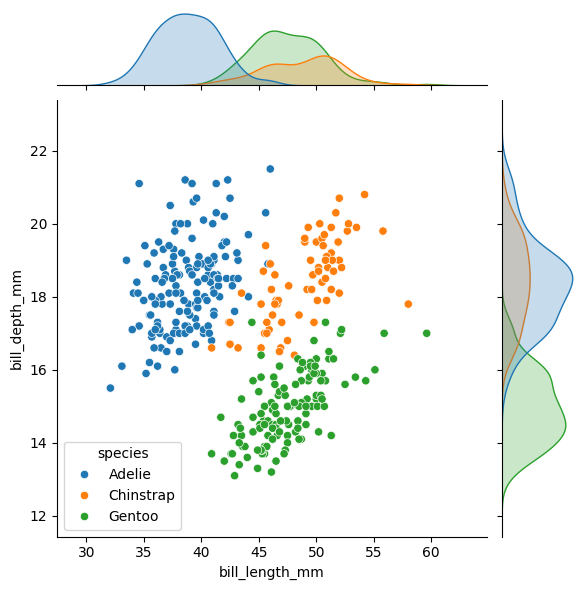

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create a jointplot
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

This single line of code creates a scatter plot of bill length vs. bill depth, with histograms on the margins, and colors points by species.


When to use JointGrid:
- You need precise control over the main plot and marginal distributions
- You want to use different plot types for the main plot and marginals
- You're creating a custom visualization that jointplot doesn't support out of the box

When to use jointplot:
- You want a quick visualization of a bivariate relationship with marginal distributions
- The default plot types (scatter plot with histograms or KDE plots) suit your needs
- You're in the early stages of exploratory data analysis


### <a id='toc3_1_'></a>[Customizing Jointplot](#toc0_)


Jointplot offers various customization options:


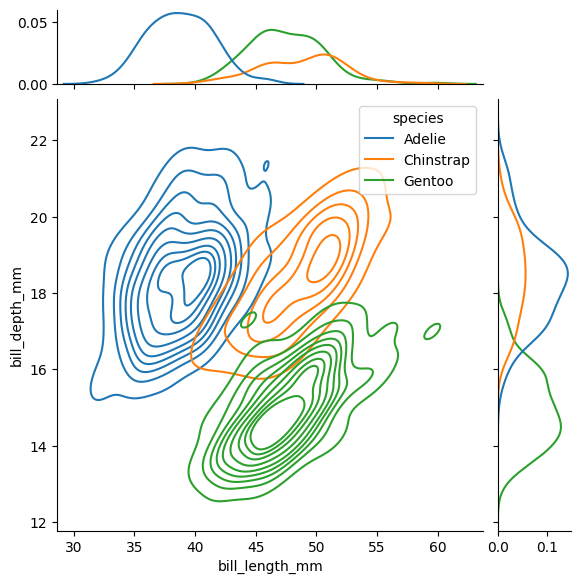

In [50]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    kind="kde",
    marginal_ticks=True
)

This example uses kernel density estimation for both the main plot and marginals, and customizes the plot size and layout.


### <a id='toc3_2_'></a>[Using JointGrid for More Flexibility](#toc0_)


Let's look at a scenario where JointGrid's flexibility is beneficial:


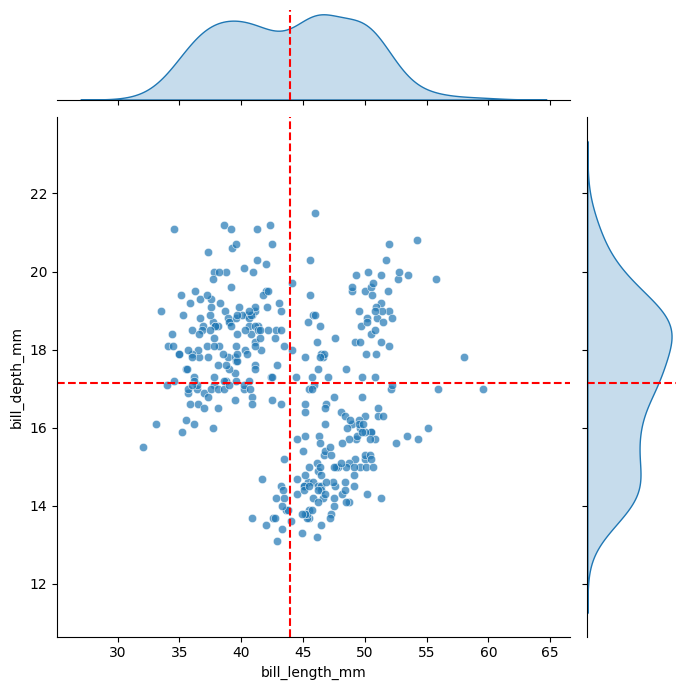

In [51]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=7)
g.plot_joint(sns.scatterplot, alpha=0.7)
g.plot_marginals(sns.kdeplot, fill=True)
g.refline(
    x=penguins["bill_length_mm"].mean(),
    y=penguins["bill_depth_mm"].mean(),
    color="red",
    linestyle="--",
)

This JointGrid uses a scatter plot for the main plot, kernel density plots for the margins, and adds reference lines at the mean values.


### <a id='toc3_3_'></a>[Advanced Example: Combining JointGrid and Regression](#toc0_)


Let's create a visualization that combines a scatter plot with regression lines and histograms:


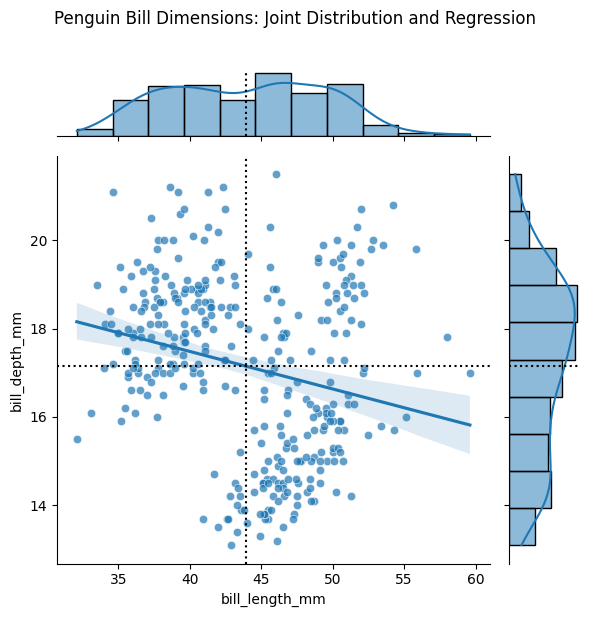

In [54]:
import numpy as np


def regression(x, y, **kwargs):
    sns.regplot(x=x, y=y, scatter=False, **kwargs)


g = sns.JointGrid(
    data=penguins, x="bill_length_mm", y="bill_depth_mm"
)
g.plot_joint(sns.scatterplot, alpha=0.7)
g.plot_marginals(sns.histplot, kde=True)
g.plot_joint(regression)
g.refline(
    x=penguins["bill_length_mm"].mean(),
    y=penguins["bill_depth_mm"].mean(),
    color="black",
    linestyle=":",
)
plt.suptitle("Penguin Bill Dimensions: Joint Distribution and Regression", y=1.02)
plt.tight_layout()

This example creates a complex visualization showing the relationship between bill length and depth, with separate regression lines for each species and reference lines at the overall means.


💡 **Pro Tip:** Start with jointplot for quick exploratory analysis. If you need more control or custom elements, switch to JointGrid.


Here are some best practices to consider when using JointGrid and jointplot:

1. **Choose appropriate plot types:** Scatter plots work well for continuous data, but consider other types (e.g., hexbin plots) for large datasets.

2. **Mind the scales:** Ensure that the scales are appropriate for your data. You might need to transform your data or adjust limits for better visualization.

3. **Use color wisely:** When using hue, choose color palettes that are colorblind-friendly and distinct.

4. **Add context:** Use titles, labels, and annotations to provide context and highlight important aspects of your data.

5. **Consider the marginal distributions:** The choice between histograms and KDE plots can affect interpretation. Choose based on your data and goals.


Understanding the relationship between JointGrid and jointplot allows you to choose the right tool for your specific visualization needs. Jointplot offers quick insights during initial data exploration, while JointGrid provides the flexibility for more detailed, publication-quality visualizations.


To summarize the differences between JointGrid/jointplot and PairGrid/pairplot:
- **Scope:** JointGrid/jointplot focus on the relationship between two variables, while PairGrid/pairplot show relationships among multiple variables.
- **Detail:** JointGrid/jointplot provide more detailed information about a single relationship, including marginal distributions.
- **Use case:** Use JointGrid/jointplot when you want to deeply explore a specific bivariate relationship. Use PairGrid/pairplot for an overview of multiple relationships in your dataset.


By mastering both JointGrid/jointplot and PairGrid/pairplot, you'll be equipped to create insightful visualizations of relationships in your data, whether you need a detailed view of a specific relationship or a broad overview of multiple variables.

## <a id='toc4_'></a>[Summary](#toc0_)

Throughout this chapter, we've explored Seaborn's powerful tools for creating structured multi-plot grids: FacetGrid, PairGrid, and JointGrid, along with their higher-level counterparts. Let's summarize the key points and provide some guidance on when to use each tool:

1. **FacetGrid and Faceting Functions**
   - Use for creating conditional small multiples
   - Ideal for exploring how relationships vary across different subsets of your data
   - Higher-level functions like `relplot()`, `displot()`, and `catplot()` use FacetGrid internally

2. **PairGrid and Pairplot**
   - Use for visualizing pairwise relationships between multiple variables
   - Pairplot offers a quick overview, while PairGrid allows for more customization
   - Excellent for initial exploratory data analysis of multivariate datasets

3. **JointGrid and Jointplot**
   - Use for detailed examination of the relationship between two variables
   - Jointplot provides a quick bivariate visualization with marginal distributions
   - JointGrid offers more flexibility for custom visualizations


The choice of visualization tool depends on your specific data and analytical goals.

- Use **FacetGrid** when:
  - You want to compare the same plot across different subgroups
  - You need to visualize how a relationship changes across categories

- Use **PairGrid/Pairplot** when:
  - You want to explore relationships among multiple variables simultaneously
  - You're in the early stages of data exploration and need a quick overview

- Use **JointGrid/Jointplot** when:
  - You want to focus on the relationship between two specific variables
  - You need to examine both the joint distribution and marginal distributions


Mastering Seaborn's multi-plot grid tools empowers you to create sophisticated, informative visualizations that can reveal complex patterns and relationships in your data. These tools are essential for both exploratory data analysis and creating publication-quality figures.


By understanding when and how to use each of these tools, you can:
- Efficiently explore and understand your data
- Communicate insights more effectively
- Create compelling visual narratives that support your analytical findings


Remember, the goal of data visualization is not just to make pretty pictures, but to gain and communicate insights. Choose your tools and design your plots with this purpose in mind, and you'll be well on your way to becoming a data visualization expert.